# Exercise 1 a)
 Import the libraries that we'll use

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, HTML, display_pretty
np.random.seed(101)

Write all the functions that we'll need

 For failure simulation

In [2]:
def failures(H):
    '''
     Simulate failures in the graph H.
     Return S = list with size of largest component. This is a fraction of the total
     number of nodes
     Return vn = list with fraction of removed nodes

    '''
    G = H.copy()
    from random import choice
    N0 = len(G)
    minComponentSize = int(0.01*N0)
    if minComponentSize < 1:
        minComponentSize = 1
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > minComponentSize):
        #print('Removing... n = ', n)
        #print(G.nodes)
        node = random.choice(G.nodes()) #select the node on the largest component
        #print('selected to removed:', node)
        G.remove_node(node)
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0]
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

def most_connected(G): # This function is used to find the most connected node
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) >= maxk):
            maxk = G.degree(i)
            node = i
    return node

For attack simulation

In [3]:
def attacks(H):
    '''
     Simulate attacks in the graph H.
     Return S = list with size of largest component. This is a fraction of the total
     number of nodes
     Return vn = list with fraction of removed nodes
    '''
    G = H.copy()
    from random import choice
    N0 = len(G)
    minComponentSize = int(0.01*N0)
    if minComponentSize < 1:
        minComponentSize = 1
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > minComponentSize):
        #print('Removing... n = ', n)
        #print(G.nodes)
        node = most_connected(G) #select the most connected node on the largest component
        #print('selected to removed:', node)
        G.remove_node(node)
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0]
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn


def fcritical(G):
    '''
        Calculate critical fraction of nodes that needs to be removed in order to
        break an heterogeneous network G.
    '''
    def momment_of_degree_distribution2(G,m):
        M = 0
        N = len(G)
        for i in G.nodes():
            M = M + G.degree(i)**m
        M = M/N
        return M
    f = 1 - 1/(momment_of_degree_distribution2(G,2)/momment_of_degree_distribution2(G,1) - 1)
    return f

Here is the action

In [4]:
def main():
    # Arguments to create the network
    N = 200
    av_degree = 2
    p = av_degree/(N-1)
    m = int(av_degree/2)

    # Create a list with the networks
    networks = []
    networks.append(nx.gnp_random_graph(N, p, seed=42, directed=False))
    networks[-1].name = 'ER'
    networks.append(nx.barabasi_albert_graph(N, m, seed=42))
    networks[-1].name = 'BA'
    networks.append(nx.watts_strogatz_graph(N, av_degree, 0.001, seed=42))
    networks[-1].name = 'WS0.001'
    networks.append(nx.watts_strogatz_graph(N, av_degree, 0.01, seed=42))
    networks[-1].name = 'WS0.01'
    networks.append(nx.watts_strogatz_graph(N, av_degree, 0.1, seed=42))
    networks[-1].name = 'WS0.1'


    # Calculate the response to failures of all the networks inside list networks
    results = []
    currentNetworkSimulations = []
    nSimulations = 2
    removedNodes = None
    for i in range(len(networks)):
        # Do simulations and append them to currentNetworkSimulations
        for j in range(nSimulations):
            if (i == 0) and (j == 0):
                componentSize, removedNodes = failures(networks[i])
            else:
                componentSize, _ = failures(networks[i])
            currentNetworkSimulations.append(componentSize)


        # Calculate the average of the simulations
        averageOfSimulations = []
        for j in range(len(currentNetworkSimulations[0])):
            partialSum = 0
            for simulation in currentNetworkSimulations:
                partialSum += simulation[j]
            #print(partialSum/len(currentNetworkSimulations))
            averageOfSimulations.append(partialSum/len(currentNetworkSimulations))

        # Append averageOfSimulations to results
        results.append(averageOfSimulations)

        # Clear list
        currentNetworkSimulations.clear()

    plt.figure()
    # Plot all results of simulation
    for i in range(len(results)):
        plt.plot(removedNodes, results[i], '-o', label=networks[i].name)
    plt.title('Failure Comparison')
    plt.legend()
    plt.xlabel("f", fontsize=20)
    plt.ylabel("S", fontsize=20)
    plt.grid(True)
    # Save figure
    plt.savefig('lastPlotEx1a.png')
    plt.show(block=True);

Call main

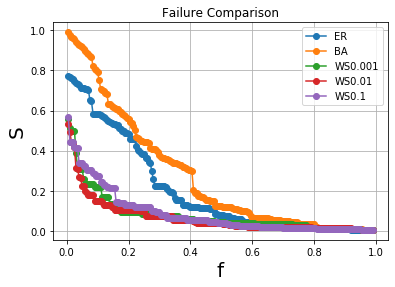

In [5]:
if __name__ == "__main__":
    main()

From the plot we can clearly see that the more scale-free a network is, the more resilient to failures it becomes.

 The BA network has a power law degree distribution and is more robust to failures than the random graph of ER that has poisson degree distribution.

 This happens because the probability of a failure in a hub to occur is low in an scale-free network. So it's more resistent to failures than a random graph and than the WS networks, those don't necessarily have hubs.